In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Read in MakeupAlley Reviews dataset
products = pd.read_csv('data/products.csv')
products.head()

,index,product,user_id,age,date,review,ratings,repurchase,packaging,price
0,0,Blush - Orgasm,Leahmoriah4,44-55,a month ago,"I'm 48, Caucasian with olive undertones so tru...",5.0,65%,4.1,4
1,1,Blush - Orgasm,Avalonian1172,30-35,2 months ago,I have to mention that the case is fabulous. A...,4.0,65%,4.1,4
2,2,Blush - Orgasm,summerseabreeze,30-35,4 months ago,A coral-pink peach blush with a very fine gold...,5.0,65%,4.1,4
3,3,Blush - Orgasm,miransees,30-35,5 months ago,"I'm not sure if it's a ""Universal"" color. It's...",3.0,65%,4.1,4
4,4,Blush - Orgasm,outofherhead,56 & Over,6 months ago,The blush that works for everyone does not wor...,2.0,65%,4.1,4


In [4]:
print(products.shape)
print(products.info())

(10348, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10348 entries, 0 to 10347
Data columns (total 10 columns):
index         10348 non-null int64
product       10348 non-null object
user_id       10348 non-null object
age           10101 non-null object
date          10348 non-null object
review        10348 non-null object
ratings       10348 non-null float64
repurchase    10348 non-null object
packaging     10348 non-null float64
price         10348 non-null int64
dtypes: float64(2), int64(2), object(6)
memory usage: 808.6+ KB
None


In [5]:
# Check for presence of NaN values
products.isnull().sum()

index           0
product         0
user_id         0
age           247
date            0
review          0
ratings         0
repurchase      0
packaging       0
price           0
dtype: int64

In [6]:
# Replace rows with null values using most frequent Age Group
mode_age = products['age'].value_counts().head(1).index[0]
products['age'] = products['age'].fillna(mode_age)

# Check if there's still any null values
products.isnull().sum()

index         0
product       0
user_id       0
age           0
date          0
review        0
ratings       0
repurchase    0
packaging     0
price         0
dtype: int64

In [7]:
products['product'].value_counts()
# Most popular product is Blush - Orgasm

Blush - Orgasm         5330
Blush - Deep Throat    1165
Blush - Sin             765
Blush - Torrid          497
Blush - Exhibit A       371
Blush - Amour           310
Blush - Luster          302
Blush - Angelika        297
Mata Hari Blush         272
Blush - Taj Mahal       262
Super Orgasm            249
Blush - Madly           248
Blush - Dolce Vita      155
Blush - Sex Appeal      125
Name: product, dtype: int64

In [8]:
products['user_id'].value_counts()
# Drop this feature because too many values but possible to explore if a user writing more reviews lead to higher likelihood of repurchasing

LayoverLifestyle    13
kathrynb23          12
JGardella           11
carrasco            10
tenderheart003       9
                    ..
stl                  1
daisyruby2000        1
ding6556             1
NYer                 1
LucaBaby             1
Name: user_id, Length: 7954, dtype: int64

In [9]:
products['date'].value_counts()
# Drop '14 years ago' and above, regroup 'months ago' rows as 'a year ago'

11 years ago     1281
12 years ago     1248
10 years ago     1143
13 years ago      860
9 years ago       759
17 years ago      759
16 years ago      746
14 years ago      689
15 years ago      654
18 years ago      575
8 years ago       537
7 years ago       368
6 years ago       238
5 years ago       134
19 years ago      121
4 years ago        98
3 years ago        52
2 years ago        33
20 years ago       20
a year ago         17
6 months ago        4
10 months ago       3
a month ago         2
9 months ago        2
7 months ago        2
4 months ago        1
5 months ago        1
2 months ago        1
Name: date, dtype: int64

In [10]:
products['price'].value_counts()
# Drop this feature because not useful

4    10348
Name: price, dtype: int64

In [11]:
products['ratings'].value_counts()
# This will be our target variable, will be changing it to binary instead

5.0    5562
4.0    2392
3.0    1403
2.0     672
1.0     319
Name: ratings, dtype: int64

In [12]:
products['age'].value_counts()

19-24        3994
25-29        2538
30-35        1600
36-43         873
Under 18      872
44-55         383
56 & Over      88
Name: age, dtype: int64

In [13]:
products['packaging'].value_counts()
# Convert to string since there are few numerical values so that we treat this as a categorical variable instead

4.1    5579
4.2    2351
4.3    2108
4.4     310
Name: packaging, dtype: int64

In [14]:
products['repurchase'].value_counts()
# Convert to string since there are few numerical values so that we treat this as a categorical variable instead

65%    5330
79%    1489
81%    1413
86%    1178
88%     302
85%     262
57%     249
75%     125
Name: repurchase, dtype: int64

In [15]:
# Convert numeric columns to categorical
products['ratings'] = products['ratings'].astype(str)
products['packaging'] = products['packaging'].astype(str)

# Check if they are converted correctly
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10348 entries, 0 to 10347
Data columns (total 10 columns):
index         10348 non-null int64
product       10348 non-null object
user_id       10348 non-null object
age           10348 non-null object
date          10348 non-null object
review        10348 non-null object
ratings       10348 non-null object
repurchase    10348 non-null object
packaging     10348 non-null object
price         10348 non-null int64
dtypes: int64(2), object(8)
memory usage: 808.6+ KB


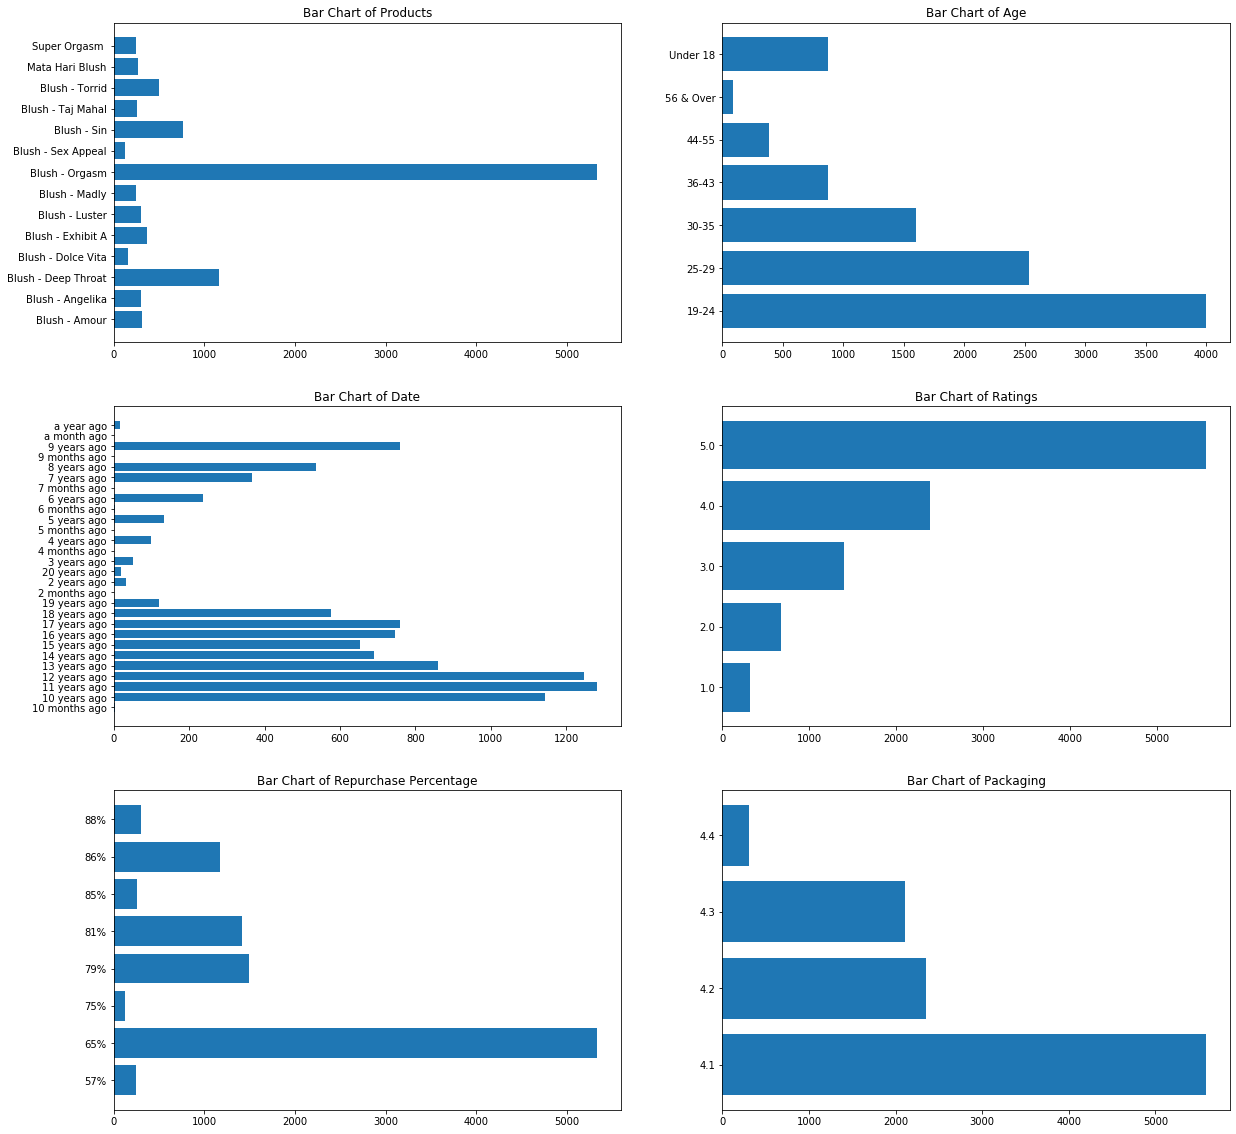

In [22]:
# Plot distribution for Product, Age, Date, Ratings, Repurchase and Packaging
fig, ax = plt.subplots(3,2,figsize=(20,20))

ax[0,0].barh(products['product'].value_counts().sort_index().index,products['product'].value_counts().sort_index().values)
ax[0,0].title.set_text('Bar Chart of Products')
ax[0,1].barh(products['age'].value_counts().sort_index().index,products['age'].value_counts().sort_index().values)
ax[0,1].title.set_text('Bar Chart of Age')

ax[1,0].barh(products['date'].value_counts().sort_index().index,products['date'].value_counts().sort_index().values)
ax[1,0].title.set_text('Bar Chart of Date')
ax[1,1].barh(products['ratings'].value_counts().sort_index().index,products['ratings'].value_counts().sort_index().values)
ax[1,1].title.set_text('Bar Chart of Ratings')

ax[2,0].barh(products['repurchase'].value_counts().sort_index().index,products['repurchase'].value_counts().sort_index().values)
ax[2,0].title.set_text('Bar Chart of Repurchase Percentage')
ax[2,1].barh(products['packaging'].value_counts().sort_index().index,products['packaging'].value_counts().sort_index().values)
ax[2,1].title.set_text('Bar Chart of Packaging')

# Most of the reviewers are millennials (reasonable, follows expectations)
# Repurchase percentages are generally quite high (all >= 50%)
# Overall Ratings are also generally quite high (more than half gave 5/5)
# Packaging rating also generally quite high (at least 4/5 stars)
# Reasonable and follows expectations because NARS is a famous makeup brand with high quality pigmented products